In [25]:
!pip install fsspec
!pip install s3fs
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 8.6MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120275 sha256=a1d2ae2027e6afa123646131df50481d609b18d4067f1332b60e73d47fb8ed00
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from datetime import datetime
import numpy as np
from fastprogress import progress_bar as pb
import seaborn as sns
sns.set(font="IPAexGothic")

In [2]:
import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('s3://fin-app/company_data/company_financial_data.csv')

In [5]:
df

,EDINETコード,証券コード,提出日,会計期間終了日,従業員数,平均臨時雇用人員,所有株式数,発行済株式（自己株式を除く。）の総数に対する所有株式数の割合,発行済株式総数,連結子会社の数,１株当たり純資産,自己資本比率,現金及び現金同等物の残高,資産,流動資産,固定資産,有形固定資産,無形固定資産,投資その他の資産,負債,流動負債,短期借入金,1年内償還予定の社債,1年内返済予定の長期借入金,固定負債,社債,転換社債型新株予約権付社債,コマーシャル・ペーパー,長期借入金,純資産,株主資本,資本金,資本剰余金,利益剰余金,自己株式,評価・換算差額等,売上高,売上原価,売上総利益,販売費及び一般管理費,...,特別利益,特別損失,税引前純利益,法人税等,純利益,親会社株主に帰属する純利益,包括利益,１株当たり純利益,調整1株当たり純利益,１株当たり配当額,株価収益率,自己資本利益率,営業活動によるキャッシュ・フロー,減価償却費、営業活動によるキャッシュ・フロー,投資活動によるキャッシュ・フロー,財務活動によるキャッシュ・フロー,現金及び現金同等物の増減,前期資産,前期売上高,前期純利益,平均年齢,平均勤続年数,平均年間給与,粗利益,売上高総利益率,売上高営業利益率,売上高経常利益率,売上高販管費率,総資本回転率,流動比率,売上高変化率,純利益変化率,期首期末平均資産,総資産経常利益率,総資産純利益率,総資産親会社株主に帰属する純利益率,自己資本,有利子負債,会社名,業種
0,E01656,7986.0,2016-03-30,2015-12-31,256.0,36.0,10831000.0,0.6099,NaN,1.0,130.13,0.567,1.975970e+08,4.072207e+09,2.108157e+09,1.964049e+09,1.600956e+09,1.177400e+07,351318000.0,1.722033e+09,1.443450e+09,NaN,NaN,NaN,2.785820e+08,NaN,NaN,NaN,NaN,2.350174e+09,2.269364e+09,1.090800e+09,6.400000e+07,1.116350e+09,-1785000.0,40280000.0,4.993508e+09,3.485282e+09,1.508225e+09,1.125485e+09,...,NaN,1048000.0,4.166170e+08,141681000.0,NaN,NaN,2.936720e+08,15.45,NaN,NaN,11.70,0.126,3.676500e+07,96484000.0,-8.786500e+07,-1.780200e+07,-68902000.0,3.645248e+09,5.168665e+09,NaN,NaN,NaN,NaN,1.508226e+09,0.302037,0.076647,0.083642,0.225390,1.226241,1.460499,-0.033888,NaN,3.858728e+09,0.108239,NaN,NaN,2.309644e+09,0.000000e+00,日本アイ・エス・ケイ,その他製品
1,E01656,7986.0,2017-03-30,2016-12-31,262.0,43.0,10377000.0,0.5843,NaN,1.0,145.77,0.588,8.233970e+08,4.402360e+09,2.323151e+09,2.079209e+09,1.673298e+09,1.584200e+07,390068000.0,1.772288e+09,1.510133e+09,NaN,NaN,NaN,2.621550e+08,NaN,NaN,NaN,NaN,2.630071e+09,2.549551e+09,1.090800e+09,6.400000e+07,1.397064e+09,-2313000.0,37454000.0,5.401520e+09,3.805790e+09,1.595729e+09,1.195552e+09,...,19620000.0,NaN,4.724060e+08,144785000.0,327621000.0,325085000.0,3.247950e+08,18.32,NaN,NaN,11.10,0.133,7.651990e+08,99596000.0,-9.475900e+07,-4.463900e+07,625800000.0,4.072207e+09,4.993508e+09,274936000.0,NaN,NaN,NaN,1.595730e+09,0.295422,0.074086,0.083826,0.221336,1.226960,1.538375,0.081708,0.191626,4.237284e+09,0.106858,0.077319,0.076720,2.587005e+09,0.000000e+00,日本アイ・エス・ケイ,その他製品
2,E01656,7986.0,2018-03-29,2017-12-31,267.0,38.0,10309000.0,0.5800,NaN,1.0,159.77,0.615,7.375520e+08,4.612234e+09,2.438579e+09,2.173654e+09,1.610004e+09,6.342000e+06,557307000.0,1.731625e+09,1.418329e+09,NaN,NaN,NaN,3.132950e+08,NaN,NaN,NaN,NaN,2.880608e+09,2.763177e+09,1.090800e+09,6.400000e+07,1.610690e+09,-2313000.0,72215000.0,5.127870e+09,3.576872e+09,1.550997e+09,1.196933e+09,...,35908000.0,36541000.0,3.881020e+08,118335000.0,269766000.0,266866000.0,3.045270e+08,15.04,NaN,NaN,13.60,0.098,7.245900e+07,107592000.0,-1.045210e+08,-5.378300e+07,-85845000.0,4.402360e+09,5.401520e+09,327621000.0,NaN,NaN,NaN,1.550998e+09,0.302464,0.069047,0.075808,0.233417,1.111797,1.719332,-0.050662,-0.176591,4.507297e+09,0.086246,0.059851,0.059208,2.835392e+09,0.000000e+00,日本アイ・エス・ケイ,その他製品
3,E01656,7986.0,2019-03-28,2018-12-31,274.0,37.0,1029000.0,0.5804,NaN,1.0,1623.90,0.610,9.294790e+08,4.724373e+09,2.640582e+09,2.083791e+09,1.575747e+09,4.079000e+06,503964000.0,1.796894e+09,1.503609e+09,NaN,NaN,NaN,2.932850e+08,NaN,NaN,NaN,NaN,2.927479e+09,2.847392e+09,1.090800e+09,6.400000e+07,1.695031e+09,-2438000.0,34369000.0,5.265440e+09,3.862507e+09,1.402932e+09,1.242081e+09,...,NaN,NaN,1.953770e+08,56544000.0,138833000.0,137581000.0,1.009860e+08,77.52,NaN,NaN,12.60,0.048,3.189610e+08,100261000.0,-7.317100e+07,-5.386200e+07,191927000.0,4.612234e+09,5.127870e+09,269766000.0,NaN,NaN,NaN,1.402933e+09,0.266442,0.030548,0.037106,0.235893,1.114527,1.756163,0.026828,-0.485358,4.668304e+09,0.041852,0.029739,0.029471,2.881761e+09,0.000000e+00,日本アイ・エス・ケイ,その他製品
4,E01656,7986.0,2020-03-26,2019-12-31,272.0,37.0,1030000.0,0.5806,NaN,1.0,1771.47,0.628,1.219999e+09,5.003175e+09,2.830508e+09,2.172666e+09,1.516361e+09,2.182000e+06,654122000.0,1.810821e+09,1.500111e+09,NaN,NaN,NaN,3.107090e+08,NaN,NaN,NaN,NaN,3.192354e+09,3.108218e+09,1.090800e+09,6.400000e+07,

In [6]:
df['会計期間終了日'] = pd.to_datetime(df['会計期間終了日'])
df['提出日'] = pd.to_datetime(df['提出日'])

In [7]:
df.columns

Index(['EDINETコード', '証券コード', '提出日', '会計期間終了日', '従業員数', '平均臨時雇用人員', '所有株式数',
       '発行済株式（自己株式を除く。）の総数に対する所有株式数の割合', '発行済株式総数', '連結子会社の数', '１株当たり純資産',
       '自己資本比率', '現金及び現金同等物の残高', '資産', '流動資産', '固定資産', '有形固定資産', '無形固定資産',
       '投資その他の資産', '負債', '流動負債', '短期借入金', '1年内償還予定の社債', '1年内返済予定の長期借入金',
       '固定負債', '社債', '転換社債型新株予約権付社債', 'コマーシャル・ペーパー', '長期借入金', '純資産', '株主資本',
       '資本金', '資本剰余金', '利益剰余金', '自己株式', '評価・換算差額等', '売上高', '売上原価', '売上総利益',
       '販売費及び一般管理費', '給料及び手当', '減価償却費、販売費及び一般管理費', '研究開発費', '営業利益', '営業外収益',
       '営業外費用', '支払利息', '経常利益', '特別利益', '特別損失', '税引前純利益', '法人税等', '純利益',
       '親会社株主に帰属する純利益', '包括利益', '１株当たり純利益', '調整1株当たり純利益', '１株当たり配当額', '株価収益率',
       '自己資本利益率', '営業活動によるキャッシュ・フロー', '減価償却費、営業活動によるキャッシュ・フロー',
       '投資活動によるキャッシュ・フロー', '財務活動によるキャッシュ・フロー', '現金及び現金同等物の増減', '前期資産', '前期売上高',
       '前期純利益', '平均年齢', '平均勤続年数', '平均年間給与', '粗利益', '売上高総利益率', '売上高営業利益率',
       '売上高経常利益率', '売上高販管費率', '総資本回転率', '流動比率', '売上高変化率', '純利益変化率', '期首期末平均資産',
       '総資産経常利益率', '総

In [60]:
target_cols = ['従業員数', '平均臨時雇用人員', '発行済株式（自己株式を除く。）の総数に対する所有株式数の割合', '発行済株式総数', '連結子会社の数', '１株当たり純資産',
       '自己資本比率', '現金及び現金同等物の残高', '資産', '流動資産', '固定資産', '有形固定資産', '無形固定資産',
       '投資その他の資産', '負債', '流動負債', '短期借入金', '1年内償還予定の社債', '1年内返済予定の長期借入金',
       '固定負債', '社債', '転換社債型新株予約権付社債', 'コマーシャル・ペーパー', '長期借入金', '純資産', '株主資本',
       '資本金', '資本剰余金', '利益剰余金', '自己株式', '評価・換算差額等', '売上高', '売上原価', '売上総利益',
       '販売費及び一般管理費', '給料及び手当', '減価償却費、販売費及び一般管理費', '研究開発費', '営業利益', '営業外収益',
       '営業外費用', '支払利息', '経常利益', '特別利益', '特別損失', '税引前純利益', '法人税等', '純利益',
       '親会社株主に帰属する純利益', '包括利益', '１株当たり純利益', '調整1株当たり純利益', '１株当たり配当額', '株価収益率',
       '自己資本利益率', '営業活動によるキャッシュ・フロー', '減価償却費、営業活動によるキャッシュ・フロー',
       '投資活動によるキャッシュ・フロー', '財務活動によるキャッシュ・フロー', '現金及び現金同等物の増減', '前期資産', '前期売上高',
       '前期純利益', '平均年齢', '平均勤続年数', '平均年間給与', '粗利益', '売上高総利益率', '売上高営業利益率',
       '売上高経常利益率', '売上高販管費率', '総資本回転率', '流動比率', '売上高変化率', '純利益変化率', '期首期末平均資産',
       '総資産経常利益率', '総資産純利益率', '総資産親会社株主に帰属する純利益率', '自己資本', '有利子負債']

In [8]:
latest_subdates_mask = (df.groupby(['証券コード'])['会計期間終了日'].transform('max') == df['会計期間終了日'])
df_latest = df[latest_subdates_mask]

In [9]:
df_latest

,EDINETコード,証券コード,提出日,会計期間終了日,従業員数,平均臨時雇用人員,所有株式数,発行済株式（自己株式を除く。）の総数に対する所有株式数の割合,発行済株式総数,連結子会社の数,１株当たり純資産,自己資本比率,現金及び現金同等物の残高,資産,流動資産,固定資産,有形固定資産,無形固定資産,投資その他の資産,負債,流動負債,短期借入金,1年内償還予定の社債,1年内返済予定の長期借入金,固定負債,社債,転換社債型新株予約権付社債,コマーシャル・ペーパー,長期借入金,純資産,株主資本,資本金,資本剰余金,利益剰余金,自己株式,評価・換算差額等,売上高,売上原価,売上総利益,販売費及び一般管理費,...,特別利益,特別損失,税引前純利益,法人税等,純利益,親会社株主に帰属する純利益,包括利益,１株当たり純利益,調整1株当たり純利益,１株当たり配当額,株価収益率,自己資本利益率,営業活動によるキャッシュ・フロー,減価償却費、営業活動によるキャッシュ・フロー,投資活動によるキャッシュ・フロー,財務活動によるキャッシュ・フロー,現金及び現金同等物の増減,前期資産,前期売上高,前期純利益,平均年齢,平均勤続年数,平均年間給与,粗利益,売上高総利益率,売上高営業利益率,売上高経常利益率,売上高販管費率,総資本回転率,流動比率,売上高変化率,純利益変化率,期首期末平均資産,総資産経常利益率,総資産純利益率,総資産親会社株主に帰属する純利益率,自己資本,有利子負債,会社名,業種
4,E01656,7986.0,2020-03-26,2019-12-31,272.0,37.0,1030000.0,0.5806,NaN,1.0,1771.47,0.628,1.219999e+09,5.003175e+09,2.830508e+09,2.172666e+09,1.516361e+09,2.182000e+06,6.541220e+08,1.810821e+09,1.500111e+09,NaN,NaN,NaN,3.107090e+08,NaN,NaN,NaN,NaN,3.192354e+09,3.108218e+09,1.090800e+09,6.400000e+07,1.955857e+09,-2.438000e+06,3.541600e+07,5.469719e+09,3.860511e+09,1.609208e+09,1.189736e+09,...,NaN,2.470000e+05,4.498820e+08,1.320660e+08,3.178150e+08,3.140630e+08,3.188620e+08,176.98,NaN,NaN,7.50,0.104,4.072570e+08,8.544300e+07,-6.287300e+07,-5.386300e+07,2.905190e+08,4.702420e+09,5.265440e+09,1.388330e+08,38.50,14.20,4789000.0,1.609208e+09,0.294203,0.076690,0.082295,0.217513,1.093250,1.886866,0.038796,1.289189,4.852798e+09,0.092757,0.065491,0.064718,3.143634e+09,0.000000e+00,日本アイ・エス・ケイ,その他製品
9,E05256,4336.0,2020-06-25,2020-03-31,503.0,NaN,1875600.0,0.8111,NaN,2.0,476.26,0.513,1.109649e+09,2.146624e+09,1.867617e+09,2.790070e+08,6.866200e+07,2.899900e+07,1.813450e+08,9.717880e+08,8.483340e+08,1.600000e+07,NaN,7.000000e+07,1.234530e+08,NaN,NaN,NaN,NaN,1.174836e+09,1.100972e+09,2.434000e+08,1.123200e+08,7.519320e+08,-6.679000e+06,3.840000e+05,6.410857e+09,5.128335e+09,1.282522e+09,1.136398e+09,...,NaN,9.774000e+06,1.714350e+08,6.382300e+07,1.076110e+08,9.904600e+07,1.074300e+08,42.83,NaN,NaN,9.20,0.093,1.029960e+08,3.077900e+07,-1.130840e+08,-2.913000e+07,-3.921900e+07,2.105521e+09,6.474980e+09,1.016740e+08,39.10,8.00,4732199.0,1.282522e+09,0.200055,0.022793,0.028266,0.177261,2.986483,2.201511,-0.009903,0.058393,2.126072e+09,0.085232,0.050615,0.046586,1.101356e+09,8.600000e+07,クリエアナブキ,サービス業
14,E02632,7459.0,2020-06-25,2020-03-31,13599.0,7794.0,56991000.0,0.2714,NaN,13.0,2382.88,0.304,2.245410e+11,1.644279e+12,1.146179e+12,4.981000e+11,2.655760e+11,1.104400e+10,2.214790e+11,1.036854e+12,9.456000e+11,NaN,NaN,3.558000e+09,9.125400e+10,NaN,3.037800e+10,NaN,3.500000e+08,6.074240e+11,4.487130e+11,2.239800e+10,1.343610e+11,3.505620e+11,-5.860900e+10,5.160500e+10,3.253079e+12,3.016382e+12,2.366960e+11,1.836290e+11,...,1.201800e+10,4.502000e+09,7.553600e+10,2.430600e+10,5.122900e+10,3.796800e+10,5.355200e+10,175.80,165.33,NaN,11.50,0.076,5.691700e+10,1.423200e+10,-1.331900e+10,-4.906700e+10,-5.470000e+09,1.617911e+12,3.181928e+12,4.542500e+10,46.20,18.30,7837112.0,2.366970e+11,0.072761,0.016326,0.020909,0.056448,1.978423,1.212118,0.022361,0.127771,1.631095e+12,0.041702,0.031408,0.023278,5.003180e+11,3.428600e+10,メディパルホールディングス,卸売業
19,E03512,3082.0,2020-09-28,2020-06-30,335.0,695.0,5990500.0,0.5860,NaN,3.0,127.20,0.157,5.045724e+09,8.335384e+09,5.656365e+09,2.679018e+09,1.353776e+09,7.079400e+07,1.254447e+09,6.955766e+09,5.233344e+09,4.200000e+09,NaN,2.597620e+08,1.722421e+09,NaN,NaN,NaN,1.498692e+09,1.379617e+09,1.311880e+09,3.815300e+08,4.955180e+08,5.486880e+08,-1.138570e+08,-1.134200e+07,8.048544e+09,2.251478e+09,5.797066e+09,6.165494e+09,...,NaN,4.555230e+08,-8.219160e+08,-2.018900e+08,-6.200260e+08,-6.092600e+08,-6.395780e+08,-59.59,NaN,NaN,-10.27,-0.384,-3.992980e+08,1.856770e+08,-4.849790e+08,4.978460e+09,4.081251e+09,4.083329e+09,9.914230e+09,1.613460e+08,38.80,7.50,5414419.0,5.797066e+09,0.720263,-0.045776,-0.045523,0.766038,0.965588,1.080832,-0.188183,-4.842835,6.209356e+09,-0.059006,-0.099854,-0.098120,1.300538e+09,5.958454e+09,きちりホールディングス,小売業
24,E02728,9888.0,2020-06-19,2020-03-31,519.0,NaN,4109000.0

In [10]:
df_latest.value_counts('証券コード').sort_values()

証券コード
9997.0    1
9895.0    1
9982.0    1
9995.0    1
9994.0    1
         ..
1376.0    1
1352.0    1
1333.0    1
2164.0    1
1301.0    1
Length: 3342, dtype: int64

### 従業員数

457


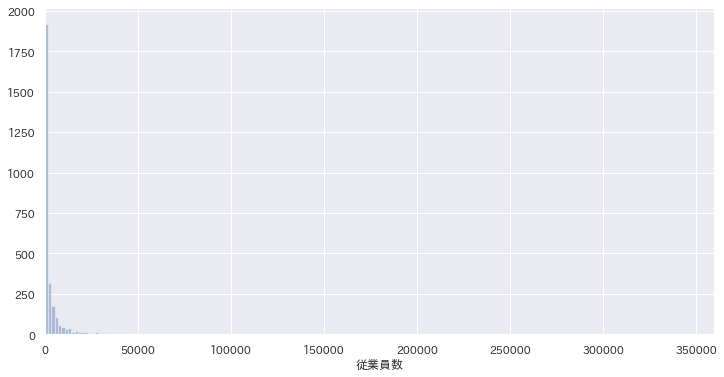

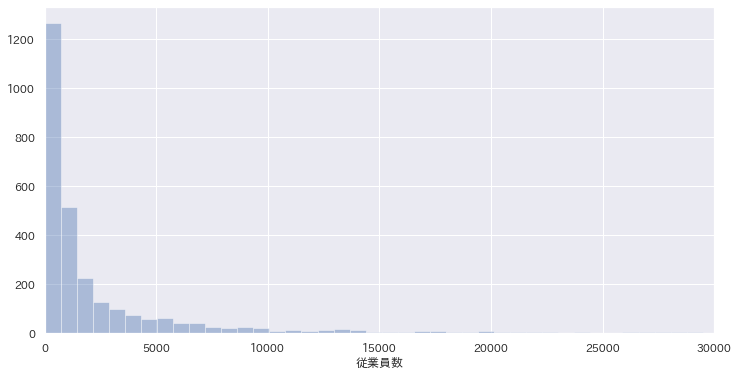

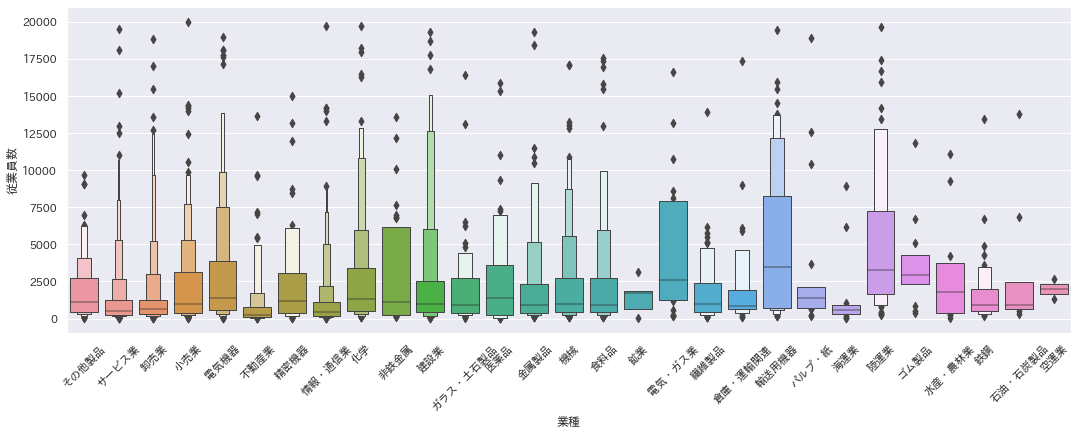

In [43]:
print(df_latest['従業員数'].isnull().sum())

plt.figure(figsize=(12, 6))
sns.distplot(df_latest['従業員数'], bins=200, kde=False)
plt.xlim(0, df_latest['従業員数'].max())
plt.show()

plt.figure(figsize=(12, 6))
sns.distplot(df_latest['従業員数'], bins=500, kde=False)
plt.xlim(0, 30000)

plt.figure(figsize=(18, 6))
sns.boxenplot(x='業種', y='従業員数', data=df_latest[df_latest['従業員数'] < 20000])
plt.xticks(rotation=45)
plt.show()

### 自己資本比率

55


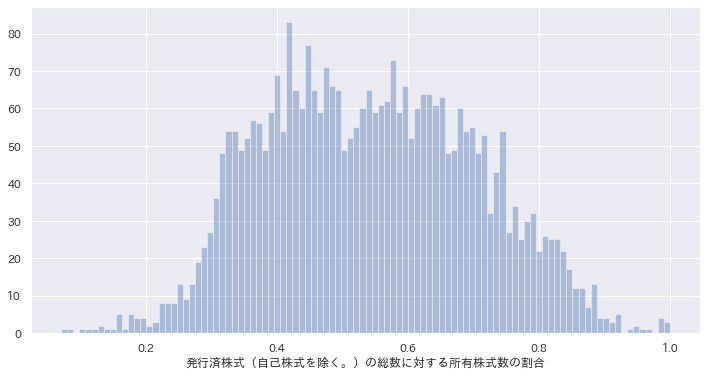

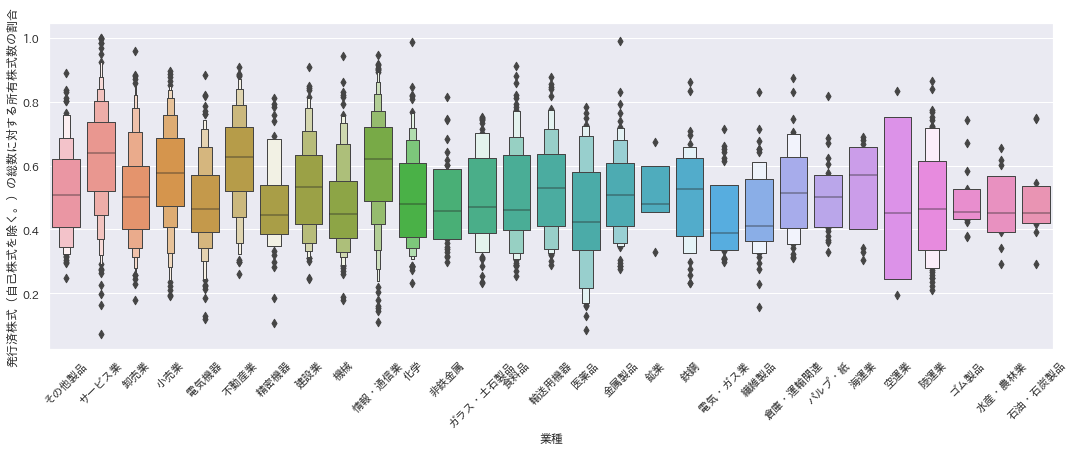

In [41]:
print(df_latest['発行済株式（自己株式を除く。）の総数に対する所有株式数の割合'].isnull().sum())

plt.figure(figsize=(12, 6))
sns.distplot(df_latest['発行済株式（自己株式を除く。）の総数に対する所有株式数の割合'], bins=100, kde=False)
plt.show()

plt.figure(figsize=(18, 6))
sns.boxenplot(x='業種', y='発行済株式（自己株式を除く。）の総数に対する所有株式数の割合', data=df_latest)
plt.xticks(rotation=45)
plt.show()

### 1株当たりの純資産(BPS)

655


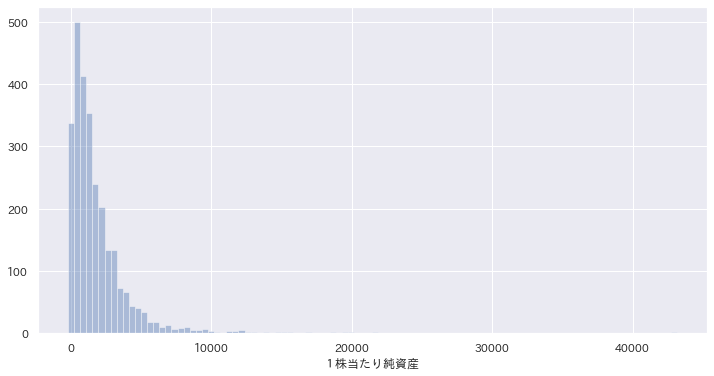

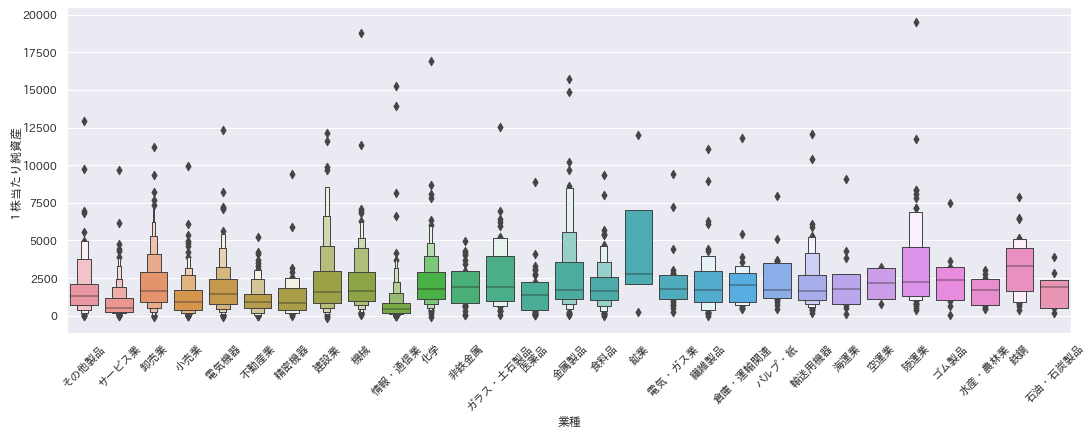

In [45]:
print(df_latest['１株当たり純資産'].isnull().sum())

plt.figure(figsize=(12, 6))
sns.distplot(df_latest['１株当たり純資産'], bins=100, kde=False)
plt.show()

plt.figure(figsize=(18, 6))
sns.boxenplot(x='業種', y='１株当たり純資産', data=df_latest[df_latest['１株当たり純資産']<20000])
plt.xticks(rotation=45)
plt.show()

### 株価収益率

892


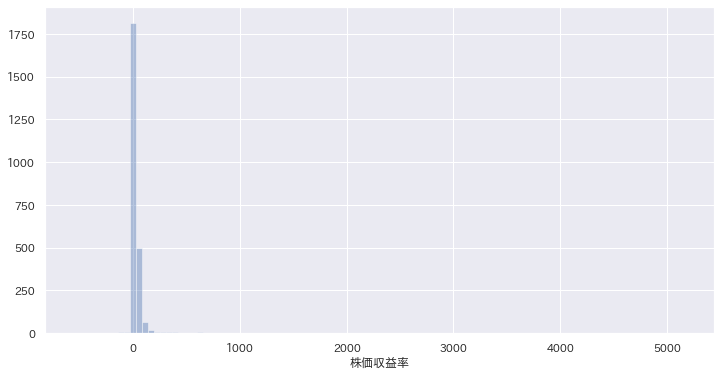

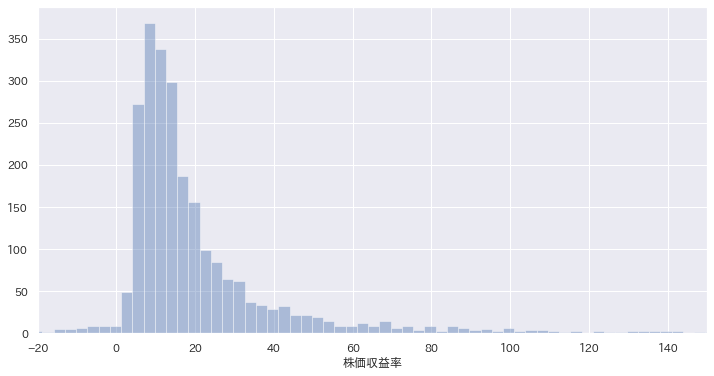

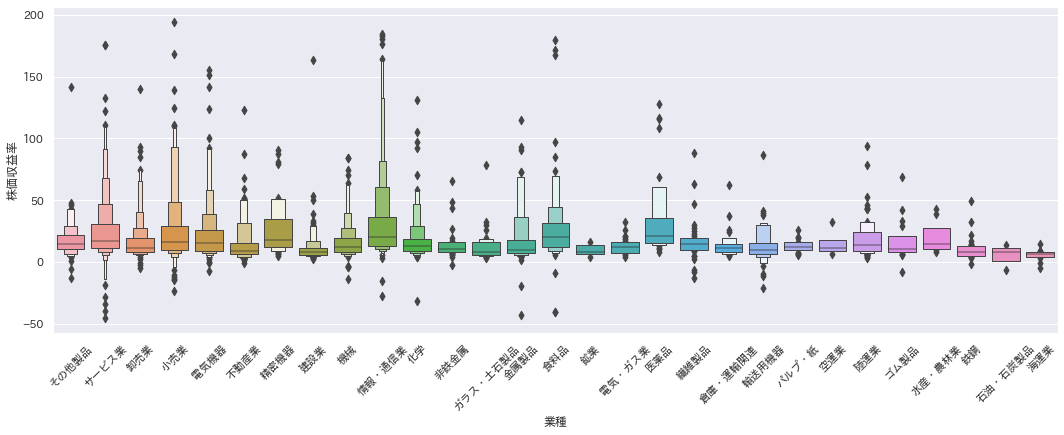

In [58]:
print(df_latest['株価収益率'].isnull().sum())

plt.figure(figsize=(12, 6))
sns.distplot(df_latest['株価収益率'], bins=100, kde=False)
plt.show()

plt.figure(figsize=(12, 6))
sns.distplot(df_latest['株価収益率'], bins=2000, kde=False)
plt.xlim(-20, 150)

plt.figure(figsize=(18, 6))
sns.boxenplot(x='業種', y='株価収益率', data=df_latest[(df_latest['株価収益率']<200) & (df_latest['株価収益率']>-50)])
plt.xticks(rotation=45)
plt.show()

715


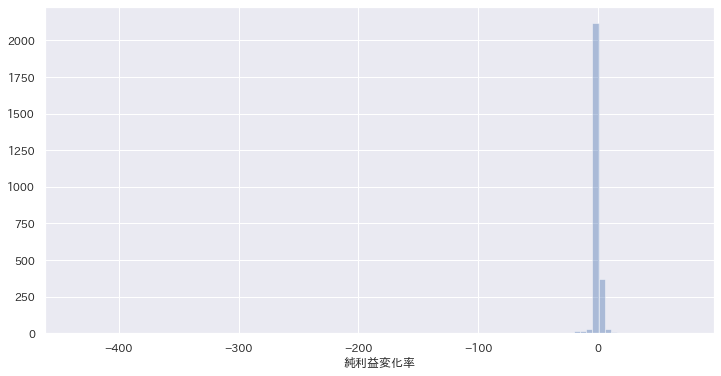

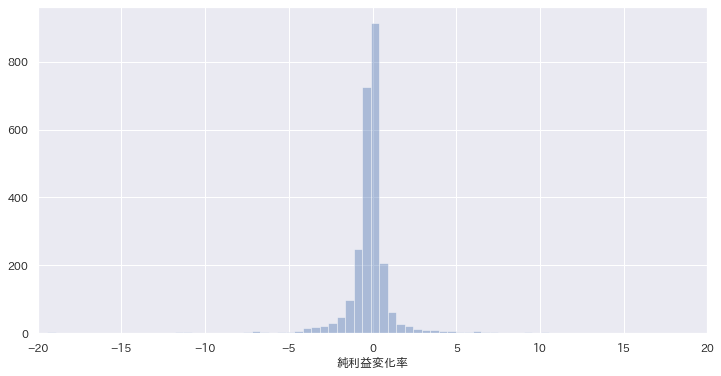

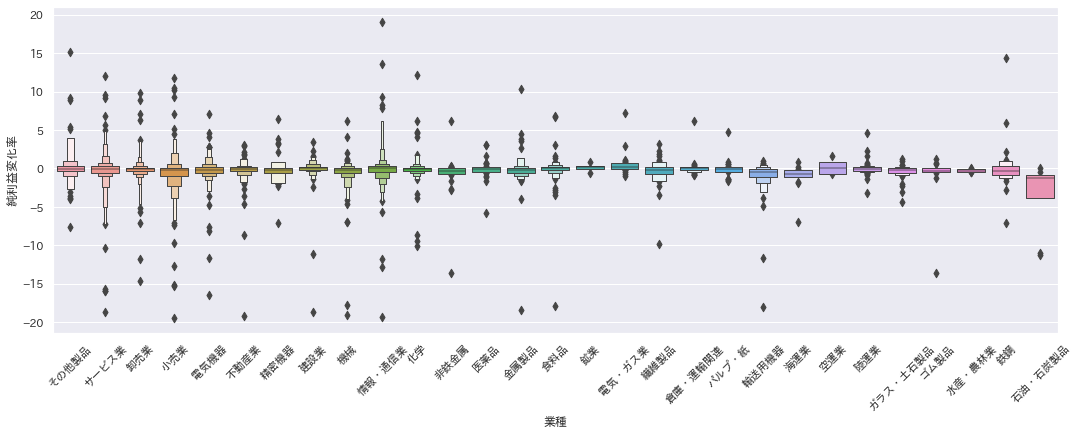

In [56]:
print(df_latest['純利益変化率'].isnull().sum())

plt.figure(figsize=(12, 6))
sns.distplot(df_latest['純利益変化率'], bins=100, kde=False)
plt.show()

plt.figure(figsize=(12, 6))
sns.distplot(df_latest['純利益変化率'], bins=1000, kde=False)
plt.xlim(-20, 20)

plt.figure(figsize=(18, 6))
sns.boxenplot(x='業種', y='純利益変化率', data=df_latest[(df_latest['純利益変化率']<20) & (df_latest['純利益変化率']>-20)])
plt.xticks(rotation=45)
plt.show()

In [62]:
import random

In [64]:
random.sample(target_cols, 10)

['給料及び手当',
 '現金及び現金同等物の残高',
 '営業外収益',
 '発行済株式（自己株式を除く。）の総数に対する所有株式数の割合',
 '販売費及び一般管理費',
 '投資その他の資産',
 '期首期末平均資産',
 '売上高変化率',
 '有利子負債',
 '投資活動によるキャッシュ・フロー']

<Figure size 1440x1440 with 0 Axes>

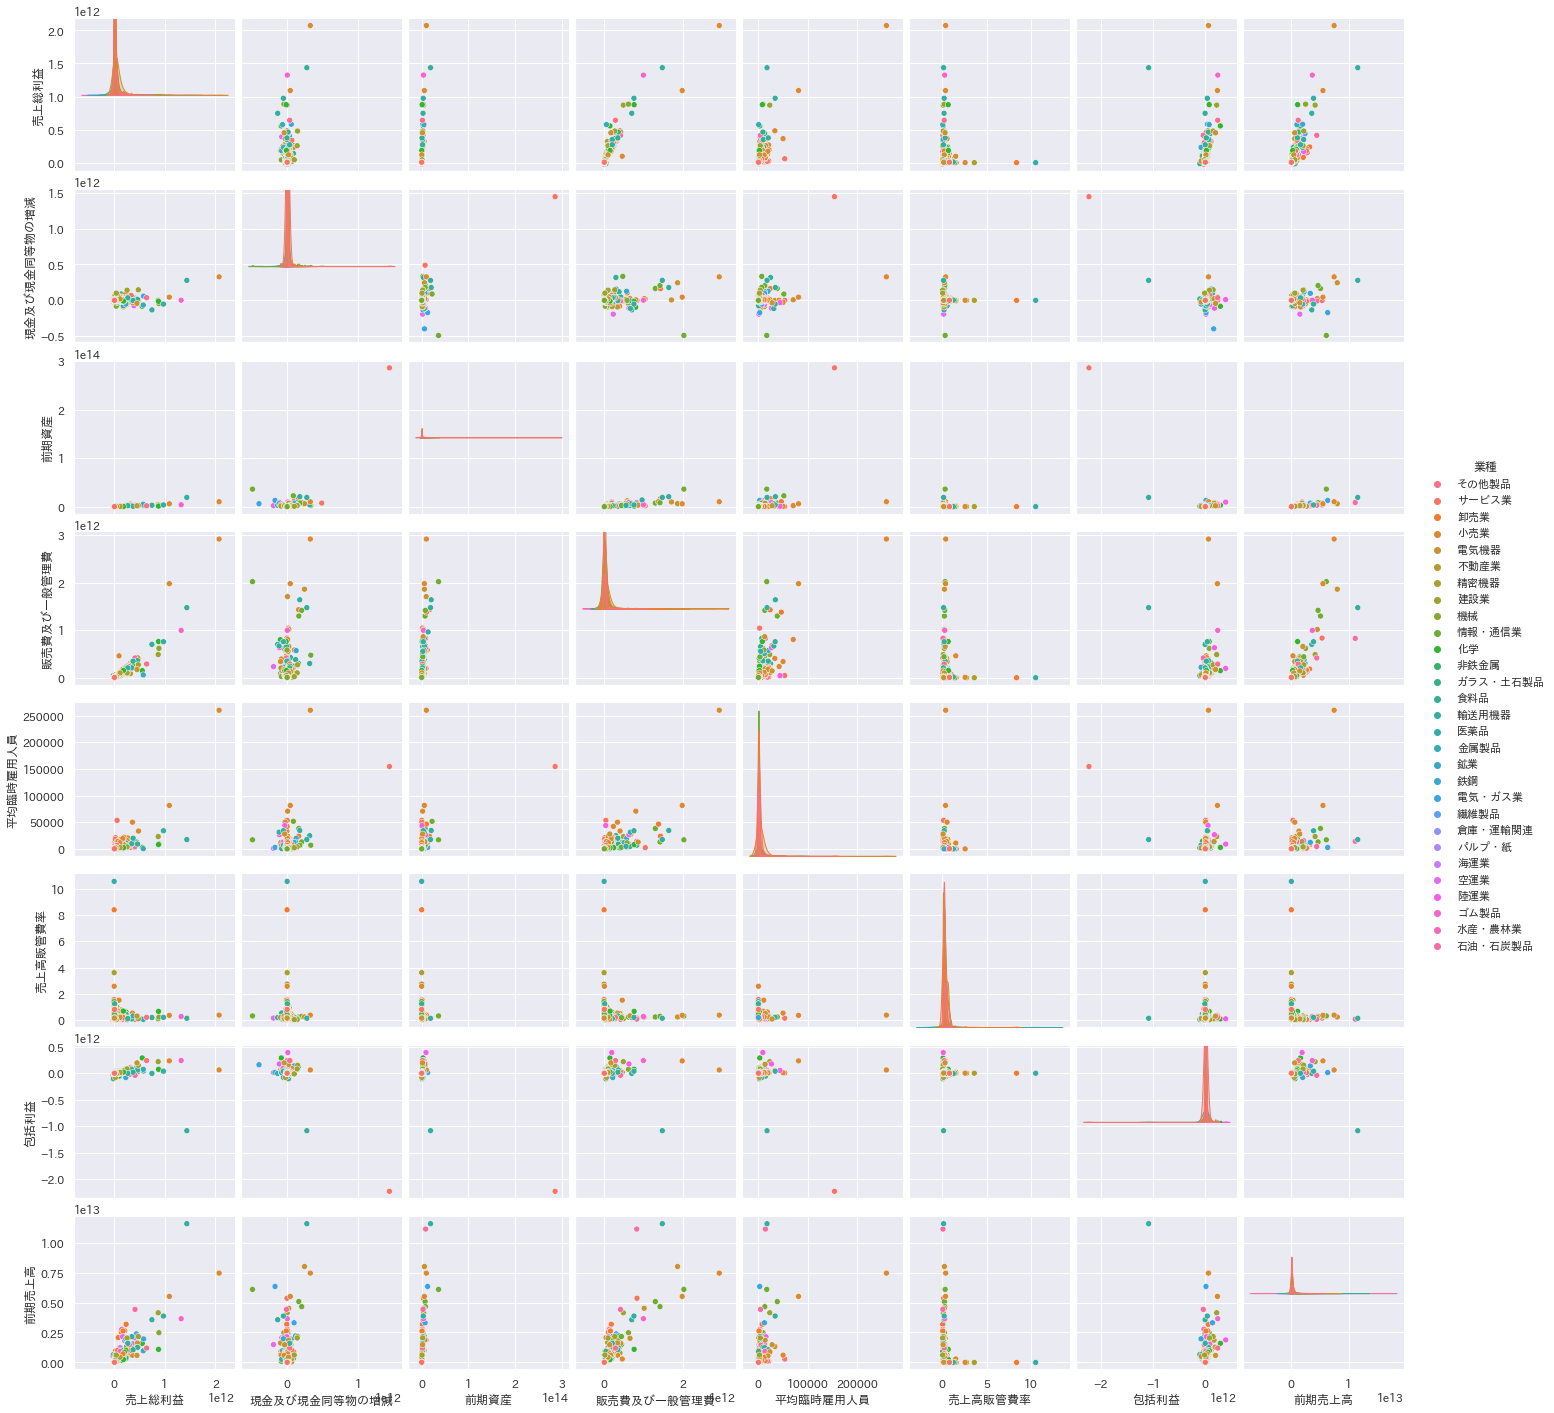

In [79]:
plt.figure(figsize=(20, 20))
_ = sns.pairplot(df_latest[random.sample(target_cols, 8) + ['業種']], hue='業種')